In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [3]:
x_train[0].shape

(28, 28)

In [4]:
#Each image in the dataset is 28x28 and the image can be represented as the array (28x28) of pixles from 0-255
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

(<matplotlib.image.AxesImage at 0x14a09f3acd0>,)

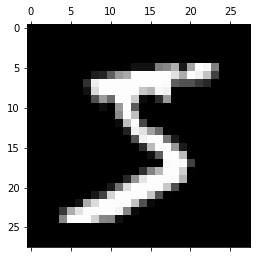

In [5]:
plt.matshow(x_train[0],cmap='gray'),

In [6]:
y_train[0]

5

In [7]:
#scaling down the pixles by dividing it by 255
x_train = x_train/255
x_test = x_test/255

In [8]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [9]:
#Reshaping the training and testing images 

X_train = x_train.reshape(len(x_train),28*28)
X_test = x_test.reshape(len(x_test),28*28)

#The aim is to arrange the pixles simultaneously layer by layer in form of a single dimension array.

In [10]:
X_test[0].shape

(784,)

In [11]:
#neural network with no hidden layer  (input layer ----. output layer)

#sequential model with input of 784 and output of 10 with activation function as sigmoid
model =keras.Sequential([keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')]) 

#the model is compiled to imcrease accuracy and optimizing the model using adam optimizer
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy']) 

model.fit(X_train, y_train, epochs=5)                #fitting data to the model in 5 cycles

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7247 - accuracy: 0.8095
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3147 - accuracy: 0.9120
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2846 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2701 - accuracy: 0.9239
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2620 - accuracy: 0.9278


In [12]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2667 - accuracy: 0.9259


[0.26670950651168823, 0.9258999824523926]

In [13]:
y_predicted=model.predict(X_test)

In [14]:
y_predicted

array([[2.96736062e-02, 2.27053434e-07, 5.89239299e-02, ...,
        9.99731421e-01, 9.01714563e-02, 6.01081133e-01],
       [4.81914818e-01, 5.63150644e-03, 9.99570727e-01, ...,
        1.48545206e-12, 1.86965078e-01, 4.03050437e-09],
       [4.77135181e-04, 9.93606091e-01, 7.01726615e-01, ...,
        1.34322405e-01, 3.35989147e-01, 5.91533482e-02],
       ...,
       [3.85457633e-06, 4.23609345e-06, 1.41704082e-03, ...,
        1.91933244e-01, 5.24762750e-01, 7.71305203e-01],
       [1.34527683e-04, 1.91152096e-04, 2.75731087e-04, ...,
        2.78529642e-05, 6.55054450e-01, 1.04116698e-04],
       [7.71975517e-03, 3.88274829e-10, 2.32760787e-01, ...,
        1.06854632e-08, 1.15384915e-04, 1.14099157e-06]], dtype=float32)

In [15]:
y_predicted[1]

array([4.8191482e-01, 5.6315064e-03, 9.9957073e-01, 4.6824050e-01,
       9.1584462e-10, 8.6233068e-01, 9.0144360e-01, 1.4854521e-12,
       1.8696508e-01, 4.0305044e-09], dtype=float32)

In [16]:
np.max(y_predicted[1])

0.9995707

In [17]:
np.argmax(y_predicted[1])

2

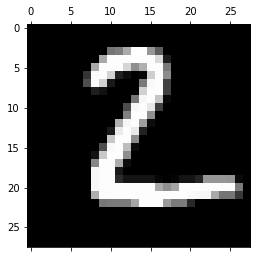

In [18]:
plt.matshow(x_test[1],cmap='gray')

### the loss of the model is 0.2692 with accuracy 0.9250

In [19]:
#Neural network with hidden layer

model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),      #784 inputs (nodes) from X_train feeds to 100 nodes in first hidden layer 
    keras.layers.Dense(50,activation='relu'),                        # 50 nodes in the next hidden layer, no input node required 
    keras.layers.Dense(10,activation='sigmoid')                       # 10 nodes in the output layer, no input node required
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4440 - accuracy: 0.8712
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1132 - accuracy: 0.9660
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0778 - accuracy: 0.9760
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0583 - accuracy: 0.9822
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0420 - accuracy: 0.9866


In [20]:
y_predicted=model.predict(X_test)

In [21]:
y_predicted

array([[4.1382611e-03, 8.6556584e-02, 2.9125601e-01, ..., 9.9995983e-01,
        2.7807075e-01, 4.3161193e-01],
       [2.6354820e-02, 9.8666430e-01, 9.9999619e-01, ..., 1.6240573e-01,
        8.2509017e-01, 1.5643256e-05],
       [3.3899844e-03, 9.9991918e-01, 2.1919009e-01, ..., 6.2061334e-01,
        4.4695082e-01, 9.9162757e-03],
       ...,
       [8.2035418e-05, 7.6477748e-01, 2.9781461e-04, ..., 6.7379183e-01,
        6.5571082e-01, 7.0139372e-01],
       [6.0494721e-02, 9.3773007e-04, 6.7845336e-05, ..., 1.0131598e-03,
        9.9978483e-01, 1.0242757e-04],
       [8.5450375e-01, 1.0823309e-03, 2.1259785e-03, ..., 3.8454191e-06,
        1.9648254e-01, 6.3106418e-04]], dtype=float32)

In [22]:
y_predicted[8]

array([8.6697936e-04, 1.6900897e-04, 3.1715631e-04, 1.8846989e-04,
       3.7034678e-01, 9.9999970e-01, 9.9994767e-01, 1.3786852e-03,
       1.7293909e-01, 8.8781333e-01], dtype=float32)

In [23]:
np.max(y_predicted[8])

0.9999997

In [24]:
np.argmax(y_predicted[8])

5

In [25]:
accuracy = []
for i in range(len(y_test)):
                      
    if abs(np.argmax(y_predicted[i])- y_test[i]) == 0:
        accuracy.append(1)
    else:
        accuracy.append(0)
        
print(sum(accuracy)/len(accuracy))

0.9729


### Opening new file to run on the model

In [85]:
from PIL import Image
im = np.array(Image.open('8.png'))
im.shape

(28, 28)

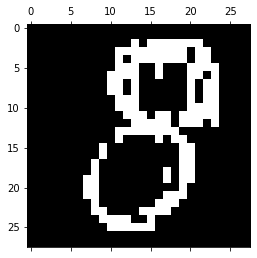

In [86]:
plt.matshow(im,cmap='gray')

In [87]:
img = im/255
img = img.reshape(1,28*28)
t = model.predict(img)

In [ ]:
t = model.predict(X_test[25])
np.argmax(t)

In [89]:
t

array([[0.36706161, 0.30868793, 0.67609817, 0.39045218, 0.42445776,
        0.66065246, 0.48800185, 0.36207688, 0.6167036 , 0.4320375 ]],
      dtype=float32)